# Import Dependencies

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

### Import functions from modules

In [3]:
from src.data_loader import load_news_data
from src.feature_engineering import add_sentiment_score, add_headline_length, add_day_of_week
from src.text_analysis import get_common_words
from src.visualizer import (
    plot_headline_length_distribution,
    plot_sentiment_distribution,
    plot_top_publishers,
    plot_articles_over_time,
    plot_articles_by_day_of_week,
    plot_common_words
)

/home/bini/Documents/repos/Nova-financial-solutions/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### File path

In [2]:
DATA_FILE_PATH = '../data/raw_analyst_ratings.csv'

### Data Loading and Preparation

In [4]:
# Data Loading and Preparation 
news_df = load_news_data(DATA_FILE_PATH)
print("Data Info:")
news_df.info()

Loading data from ../data/raw_analyst_ratings.csv...
Data loaded and initial date cleaning complete.
Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 55987 entries, 0 to 1407270
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype                    
---  ------      --------------  -----                    
 0   Unnamed: 0  55987 non-null  int64                    
 1   headline    55987 non-null  object                   
 2   url         55987 non-null  object                   
 3   publisher   55987 non-null  object                   
 4   date        55987 non-null  datetime64[ns, UTC-04:00]
 5   stock       55987 non-null  object                   
dtypes: datetime64[ns, UTC-04:00](1), int64(1), object(4)
memory usage: 3.0+ MB


### Feature Engineering

In [5]:
# Add new analytical columns to the DataFrame
news_df = add_sentiment_score(news_df)
news_df = add_headline_length(news_df)
news_df = add_day_of_week(news_df)

print("\nDataFrame with new features:")
print(news_df[['headline', 'sentiment', 'headline_length', 'day_of_week']].head())

Calculating sentiment scores...


Pandas Apply: 100%|██████████| 55987/55987 [00:10<00:00, 5531.05it/s] 


DataFrame with new features:
                                            headline  sentiment  \
0            Stocks That Hit 52-Week Highs On Friday        0.0   
1         Stocks That Hit 52-Week Highs On Wednesday        0.0   
2                      71 Biggest Movers From Friday        0.0   
3       46 Stocks Moving In Friday's Mid-Day Session        0.0   
4  B of A Securities Maintains Neutral on Agilent...        0.0   

   headline_length day_of_week  
0               39      Friday  
1               42   Wednesday  
2               29     Tuesday  
3               44      Friday  
4               87      Friday  


## Exploratory Data Analysis and Visualization

### Distributions


Plotting distributions...


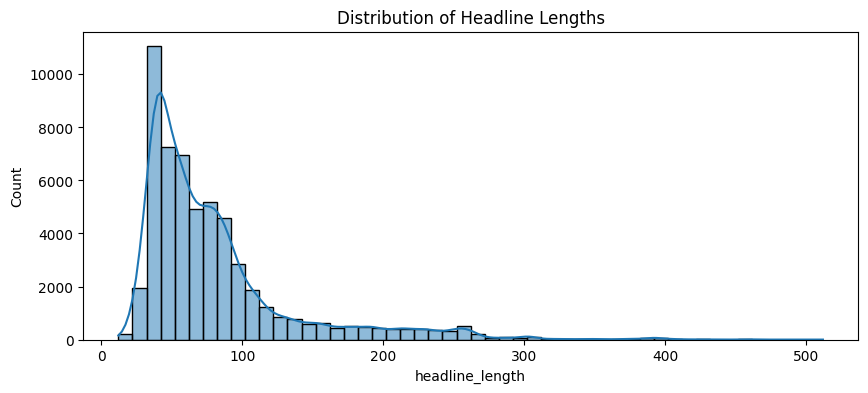

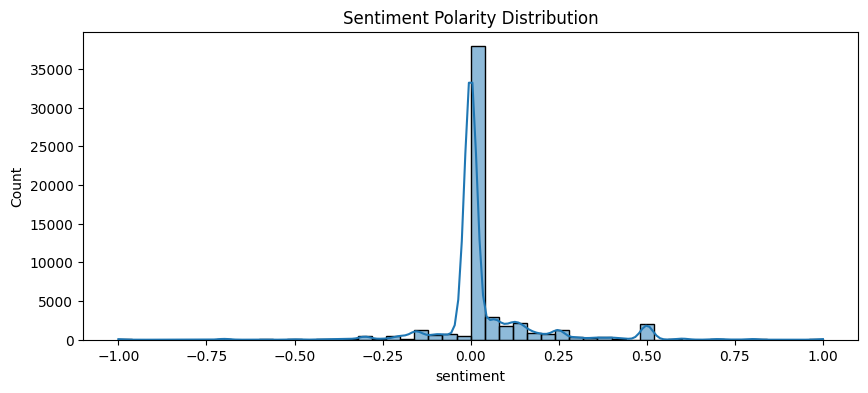

In [6]:
# --- Distributions ---
print("\nPlotting distributions...")
plot_headline_length_distribution(news_df)
plot_sentiment_distribution(news_df)

### Publisher Analysis


Plotting publisher data...


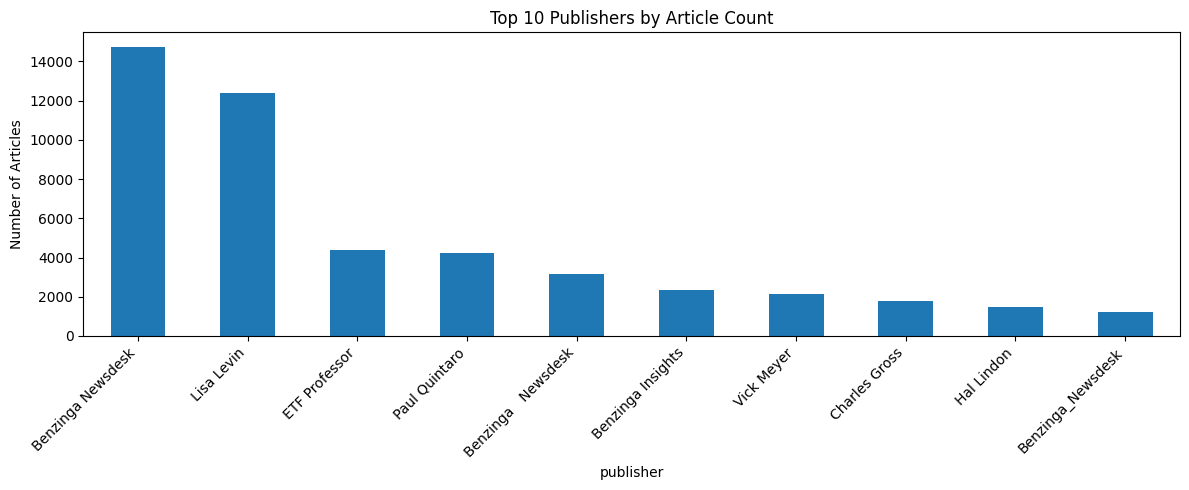

In [7]:
# --- Publisher Analysis ---
print("\nPlotting publisher data...")
plot_top_publishers(news_df, top_n=10)

### Time Series Analysis


Plotting time series data...


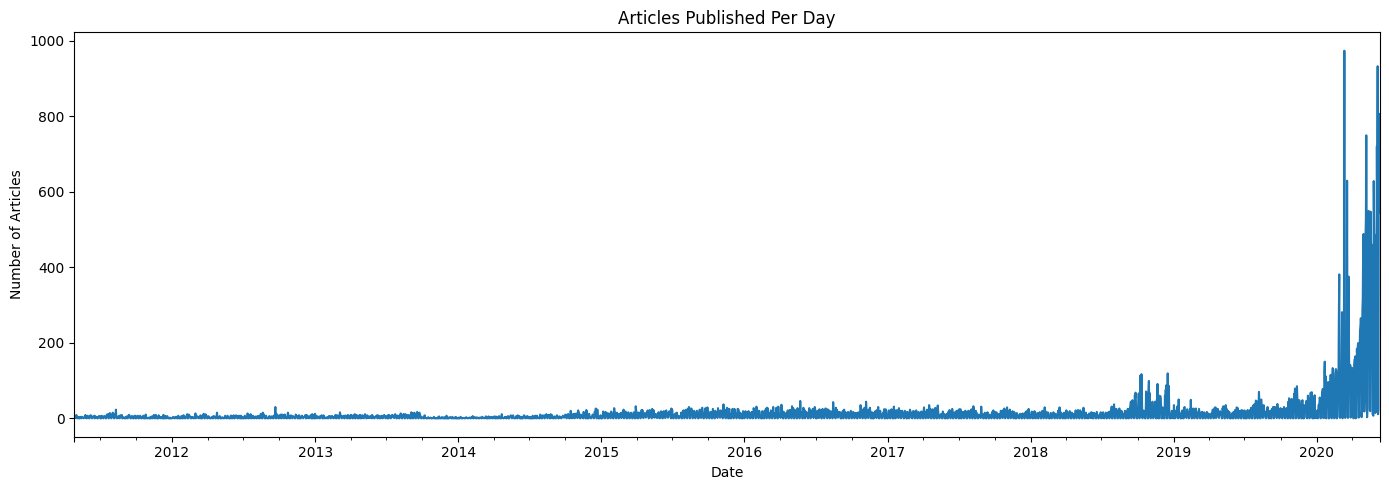

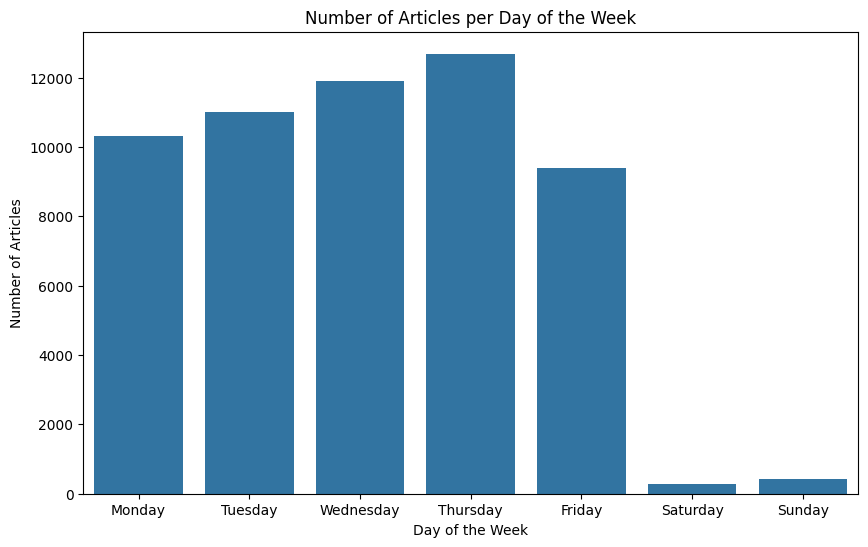

In [8]:
# --- Time Series Analysis ---
print("\nPlotting time series data...")
plot_articles_over_time(news_df.copy()) # Use a copy to avoid index modification issues
plot_articles_by_day_of_week(news_df)

### Text analysis


Performing text analysis...
Finding top 20 common words...

Most common words:
         word  count
0      stocks  12747
1      shares   8326
2     trading   6547
3         hit   5895
4         eps   5503
5       price   5015
6      target   4650
7     several   4650
8   companies   4648
9       sales   4381
10     market   3971
11     higher   3816
12       lows   3703
13  maintains   3266
14        new   3099
15    session   3053
16         us   3053
17    reports   3016
18     moving   2867
19       amid   2672


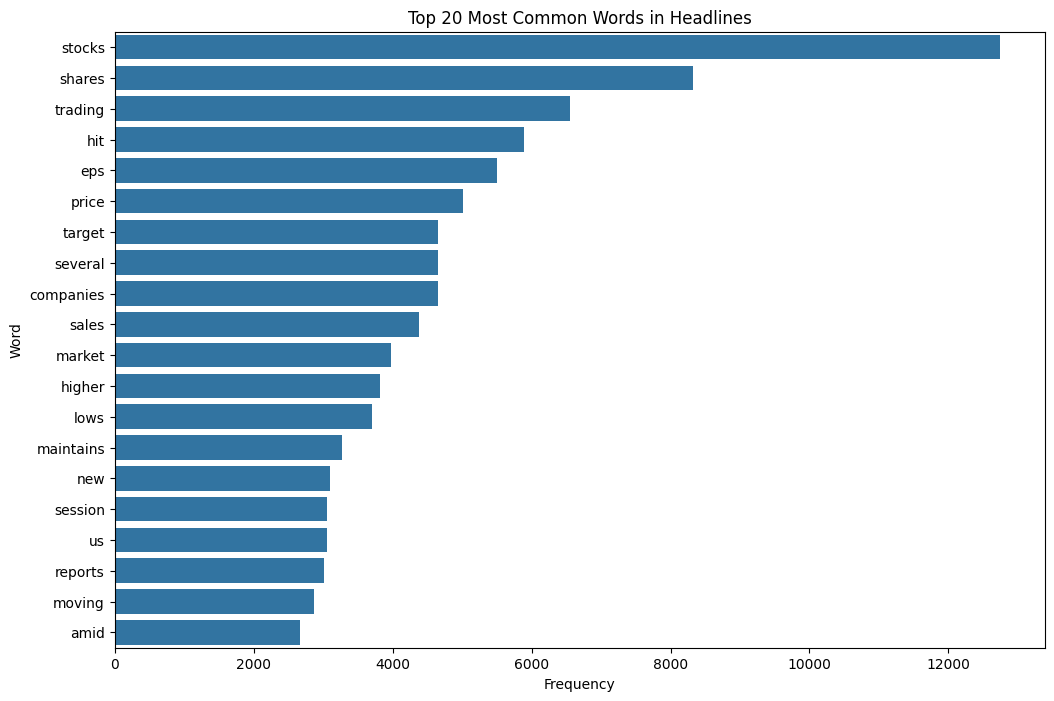

In [9]:
# --- Text Analysis ---
print("\nPerforming text analysis...")
common_words_df = get_common_words(news_df, top_n=20)
print("\nMost common words:")
print(common_words_df)
plot_common_words(common_words_df)